**EMOTION DETECTION**

In [1]:
#importing the required pre-requiste Libraries
import matplotlib.pyplot as plt
import cv2
import random
from glob import glob
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
import tensorflow as tf

**DATASET**

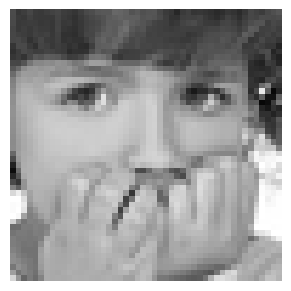

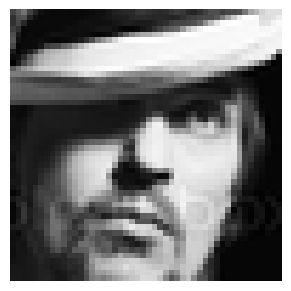

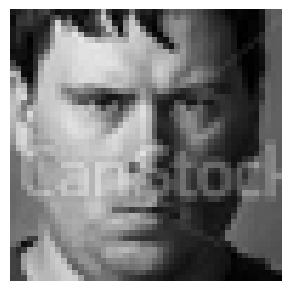

In [2]:
#Randomly printing 3 images from our Train Dataset
imgs = glob("train/**/**")
for i in range(3):
    img = random.choice(imgs)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(img));plt.axis('off')

***Data Training***

In [3]:
help(ImageDataGenerator.flow_from_directory)

Help on function flow_from_directory in module keras.src.preprocessing.image:

flow_from_directory(self, directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest', keep_aspect_ratio=False)
    Takes the path to a directory & generates batches of augmented data.
    
    Args:
        directory: string, path to the target directory. It should contain
          one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images
          inside each of the subdirectories directory tree will be included
          in the generator. See [this script](
          https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
          for more details.
        target_size: Tuple of integers `(height, width)`, defaults to `(256,
          256)`. The dimensions to which all images found will be resized.
        

In [4]:
'''Using the data Generator for the test and train data sets
The test set is used for validation of the model
'''
batch_size = 64
datgen_train = ImageDataGenerator()
train_gen = datgen_train.flow_from_directory('train/', batch_size = 64, target_size = (48,48), color_mode = "grayscale", shuffle = True, class_mode = "categorical")
trainval_gen = datgen_train.flow_from_directory('test/', batch_size = 64, target_size = (48,48), color_mode = "grayscale", shuffle = True, class_mode = "categorical")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


***Model Defining***

In [5]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [6]:
def Dense_lyr(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [9]:
def model_cre(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_lyr(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [10]:
model = model_cre((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_3 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 activation_3 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 24, 24, 32)        0     

***Training the Model***

In [11]:
help(ModelCheckpoint)

Help on class ModelCheckpoint in module keras.src.callbacks:

class ModelCheckpoint(Callback)
 |  ModelCheckpoint(filepath, monitor: str = 'val_loss', verbose: int = 0, save_best_only: bool = False, save_weights_only: bool = False, mode: str = 'auto', save_freq='epoch', options=None, initial_value_threshold=None, **kwargs)
 |  
 |  Callback to save the Keras model or model weights at some frequency.
 |  
 |  `ModelCheckpoint` callback is used in conjunction with training using
 |  `model.fit()` to save a model or weights (in a checkpoint file) at some
 |  interval, so the model or weights can be loaded later to continue the
 |  training from the state saved.
 |  
 |  A few options this callback provides include:
 |  
 |  - Whether to only keep the model that has achieved the "best performance" so
 |    far, or whether to save the model at the end of every epoch regardless of
 |    performance.
 |  - Definition of 'best'; which quantity to monitor and whether it should be
 |    maximize

In [17]:
epochs = 15
steps_per_epoch = train_gen.n//train_gen.batch_size
validation_steps = trainval_gen.n//trainval_gen.batch_size

checkpoint = ModelCheckpoint("model_emo.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

In [18]:
history = model.fit(
x = train_gen,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = trainval_gen,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 0.9723 - accuracy: 0.6340
Epoch 1: saving model to model_emo.h5
448/448 [==============================] - 201s 449ms/step - loss: 0.9723 - accuracy: 0.6340 - val_loss: 1.1561 - val_accuracy: 0.5752
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 0.9348 - accuracy: 0.6518
Epoch 2: saving model to model_emo.h5
448/448 [==============================] - 200s 445ms/step - loss: 0.9348 - accuracy: 0.6518 - val_loss: 1.1108 - val_accuracy: 0.5965
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 0.8954 - accuracy: 0.6688
Epoch 3: saving model to model_emo.h5
448/448 [==============================] - 201s 449ms/step - loss: 0.8954 - accuracy: 0.6688 - val_loss: 1.1618 - val_accuracy: 0.5795
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 0.8613 - accuracy: 0.6802
Epoch 4: saving model to model_emo.h5
448/448 [==============================] - 202s 449ms/step 

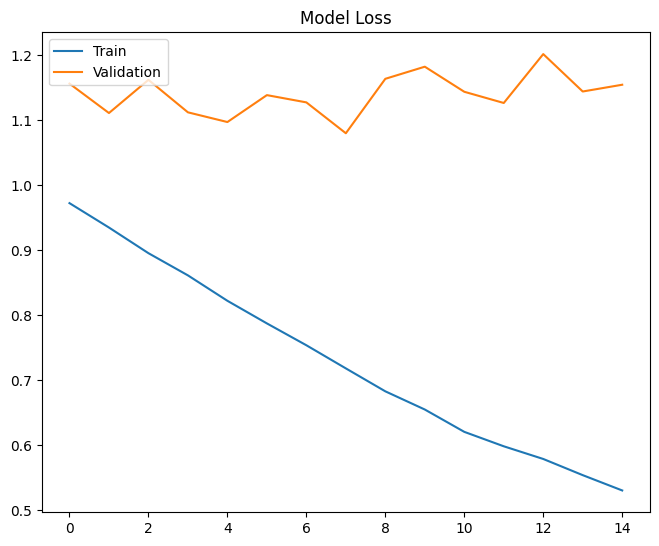

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [20]:
model_json = model.to_json()
with open("model_1.json","w") as json_file:
    json_file.write(model_json)